In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [15]:
def cleanCSV(PATH, idx):
    DF = pd.read_csv(PATH)
    DF.drop_duplicates(subset=['Date', 'Time'], keep='last', inplace=True)
    DF[f'NIFTY{idx}_MID'] = DF.apply(lambda row : (row['BuyPrice']+row['SellPrice'])/2 ,axis=1)
    DF[f'NIFTY{idx}_SPREAD'] = DF.apply(lambda row : row['SellPrice']-row['BuyPrice'] ,axis=1)
    DF.drop(['Date', 'LTP', 'BuyPrice', 'BuyQty', 'SellPrice', 'SellQty', 'LTQ', 'OpenInterest', 'Ticker'], axis=1, inplace=True)
    return DF

DATA = cleanCSV('./NIFTY-I.NFO.csv', 1)
# Change to outer join from inner join (by using how='outer') to preserve data at the cost of visual representation.
DATA = pd.merge(DATA, cleanCSV('./NIFTY-II.NFO.csv', 2), how='inner', left_on = 'Time', right_on = 'Time')
DATA = pd.merge(DATA, cleanCSV('./NIFTY-III.NFO.csv', 3), how='inner', left_on = 'Time', right_on = 'Time')

DATA['DIFF1'] = DATA.apply(lambda row : row['NIFTY2_MID']-row['NIFTY1_MID'] ,axis=1)
DATA['DIFF2'] = DATA.apply(lambda row : row['NIFTY3_MID']-row['NIFTY2_MID'] ,axis=1)
DATA.fillna(0, inplace=True)

DATA.to_csv('output.csv')


In [16]:
temp = pd.read_csv('./NIFTY-I.NFO.csv')
temp.head(10)

,Ticker,Date,Time,LTP,BuyPrice,BuyQty,SellPrice,SellQty,LTQ,OpenInterest
0,NIFTY-I.NFO,03/01/2022,09:15:00,17443.00,17425.25,200,17430.85,200,1700,10274450
1,NIFTY-I.NFO,03/01/2022,09:15:00,17443.00,17425.25,200,17430.85,200,0,10274450
2,NIFTY-I.NFO,03/01/2022,09:15:00,17443.00,17425.25,200,17430.85,200,0,10274450
3,NIFTY-I.NFO,03/01/2022,09:15:00,17410.05,17425.25,200,17430.85,200,0,10274450
4,NIFTY-I.NFO,03/01/2022,09:15:00,17422.05,17419.00,50,17424.75,400,3300,10274450
5,NIFTY-I.NFO,03/01/2022,09:15:02,17427.85,17427.80,250,17429.90,350,3600,10274450
6,NIFTY-I.NFO,03/01/2022,09:15:03,17426.65,17426.95,200,17431.50,50,1650,10274450
7,NIFTY-I.NFO,03/01/2022,09:15:04,17434.45,17431.55,50,17434.45,300,5100,10274450
8,NIFTY-I.NFO,03/01/2022,09:15:05,17434.90,17434.90,400,17435.00,350,11000,10274450
9,NIFTY-I.NFO,03/01/2022,09:15:06,17447.15,17441.00,50,17443.85,200,8550,10274450


In [17]:
SUMMARY = {}
SUMMARY['NIFTY1_SPREAD_MEAN'] = DATA['NIFTY1_SPREAD'].mean()
SUMMARY['NIFTY1_SPREAD_STANDARD_DEVIATION'] = DATA['NIFTY1_SPREAD'].std()
SUMMARY['NIFTY2_SPREAD_MEAN'] = DATA['NIFTY2_SPREAD'].mean()
SUMMARY['NIFTY2_SPREAD_STANDARD_DEVIATION'] = DATA['NIFTY2_SPREAD'].std()
SUMMARY['NIFTY3_SPREAD_MEAN'] = DATA['NIFTY3_SPREAD'].mean()
SUMMARY['NIFTY3_SPREAD_STANDARD_DEVIATION'] = DATA['NIFTY3_SPREAD'].std()
print(json.dumps(SUMMARY, indent=4))


{
    "NIFTY1_SPREAD_MEAN": 1.3016763538419218,
    "NIFTY1_SPREAD_STANDARD_DEVIATION": 0.8091401573911559,
    "NIFTY2_SPREAD_MEAN": 2.5009675361497976,
    "NIFTY2_SPREAD_STANDARD_DEVIATION": 0.9826029526913784,
    "NIFTY3_SPREAD_MEAN": 3.5370605330310623,
    "NIFTY3_SPREAD_STANDARD_DEVIATION": 1.356893413766449
}


<AxesSubplot: xlabel='Time'>

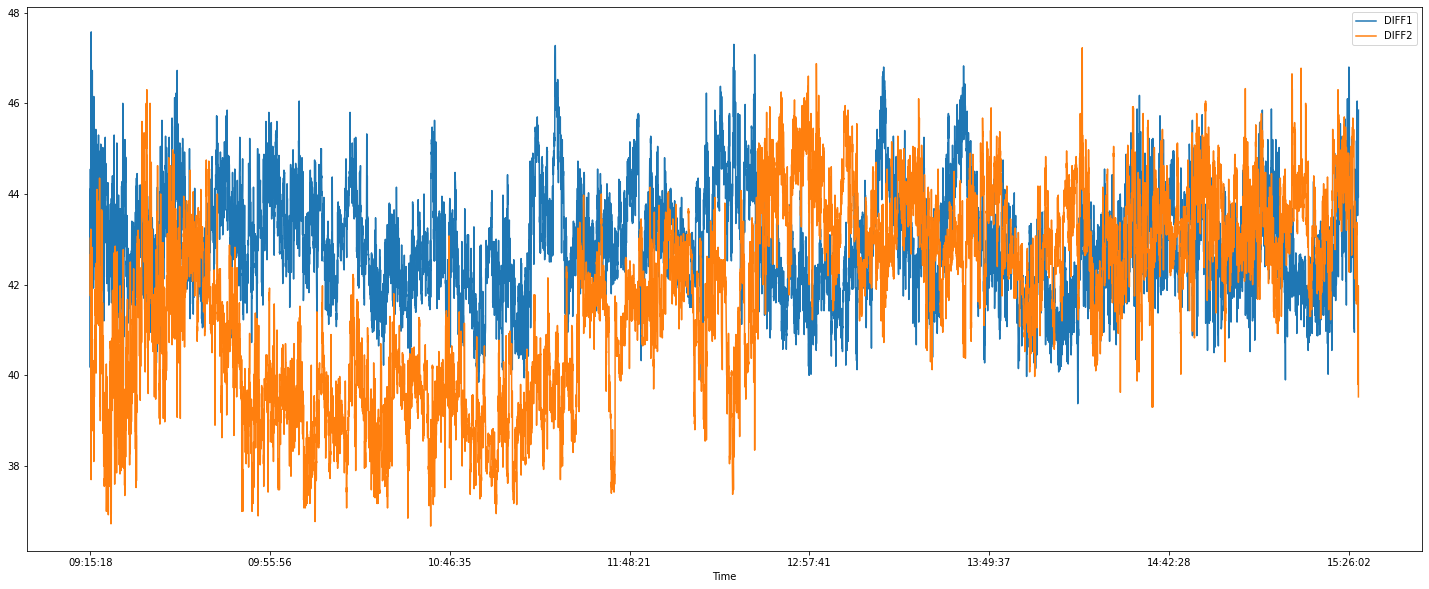

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
DATA.plot(x = 'Time', y = ['DIFF1', 'DIFF2'], ax = ax)

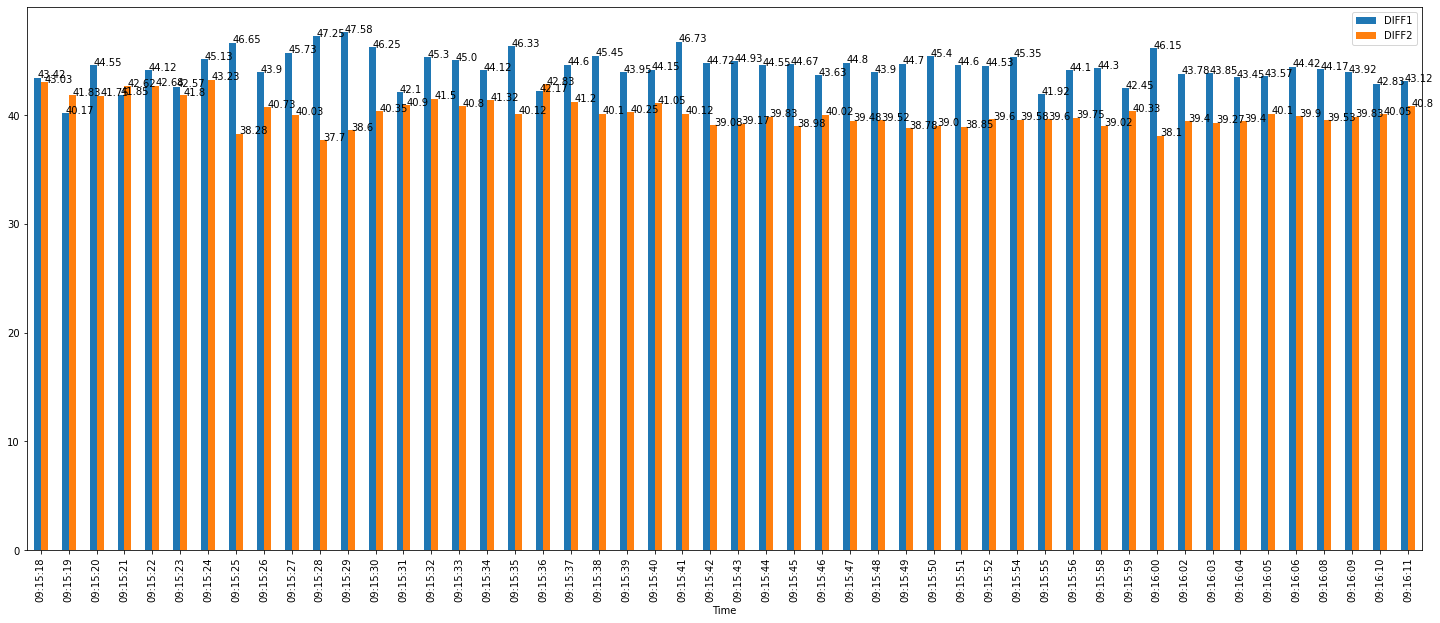

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))
DATA.head(50).plot.bar(x = 'Time', y = ['DIFF1', 'DIFF2'], ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))